<a href="https://colab.research.google.com/github/AryamaSinghParihar/LAS_files--log_data_analysis_and_evaluation/blob/main/LAS_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAS File reading and interpretation project
What are .las files?
Log ASCII Standard (LAS) files are a common Oil & Gas industry format for storing and transferring well log data. It is used to store log curve data as well as information about the well. In this project i will convert .las file and plot it in various forms.

In [46]:
pip install lasio

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns

In [48]:
#loading in our file using lasio
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lasio is a library that can be used to read and develop .las files. || lasio.read can be used to load in the data

In [49]:
las = lasio.read('/content/drive/My Drive/LAS_FINAL_PROJECT/15-9-19_SR_COMP.LAS')

In [50]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [51]:
#to look at a particular section we can pass one of the keys
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

In [52]:
#Well name, location and depth range can be found using a simple for loop to go over each header item.
#here we are printing description, mnemonics and value; A mnemonic is a word, sentence or poem used to help remember a rule, name, etc
for item in las.sections['Well']:
  print(f"{item.descr}({item.mnemonic}): \t\t {item.value}")

Top Depth(STRT): 		 102.1568
Bottom Depth(STOP): 		 4636.514
Depth Increment(STEP): 		 0.1524
Null Value(NULL): 		 -999.25
Field Name(FLD): 		 Q15
NAME(WELL): 		 15/9-19
WELLBORE(WBN): 		 15/9-19 SR
COUNTRY(NATI): 		 NOR
COUNTRY(CTRY): 		 NOR
OPERATOR(COMP): 		 STATOIL
PERM DATUM(PDAT): 		 MSL
RIG NAME(COUN): 		 NORTH SEA
STATE(STAT): 		 NORWAY
PB WELL ID(PBWE): 		 15/9-19
PB WELLBORE ID(APIN): 		 15/9-19 SR
PB WELL NAME SET(PBWS): 		 ALL


In [53]:
#we can also call upon different sections using following
las.well.WELL.value #here we can extract the well name using las.well

'15/9-19'

In [54]:
#To see what curve mnemonics are present within the las file we can loop through las.curves
for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [55]:
#Data loaded in using LASIO can be converted to a pandas dataframe using the .df() function.
#This allows us to easily plot data and pass it into one of the many machine learning algorithms.
well = las.df()
well.reset_index(inplace=True)
well.rename(columns={'DEPT':'DEPTH'}, inplace=True)

In [56]:
#The .describe() function, provides statistical information about each curve and can be a useful QC for each curve.
#We also have  .head() function which generates a table view of the header and the first 5 rows within the dataframe and .info() function provides information about the data types and how many non-null values are present within each curve
well.describe()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6701.000000,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,4125.974000,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,294.826397,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,3615.434000,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,3870.704000,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,4125.974000,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,4381.244000,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,4636.514000,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


The columns represent the following:


*  AC for acoustic compressional slowness
*CALI for borehole caliper
*DEN for bulk density
*GR for gamma ray
*NEU for neutron porosity
*RDEP for deep resisitivity
*RMED for medium resistivity


# Creating Gamma-Neutron crossplot/ scatterplot
These two measurements are often plotted like this and can tell us a number of different things about the intervals logged, including hydrocarbon presence, lithology, and bad data.


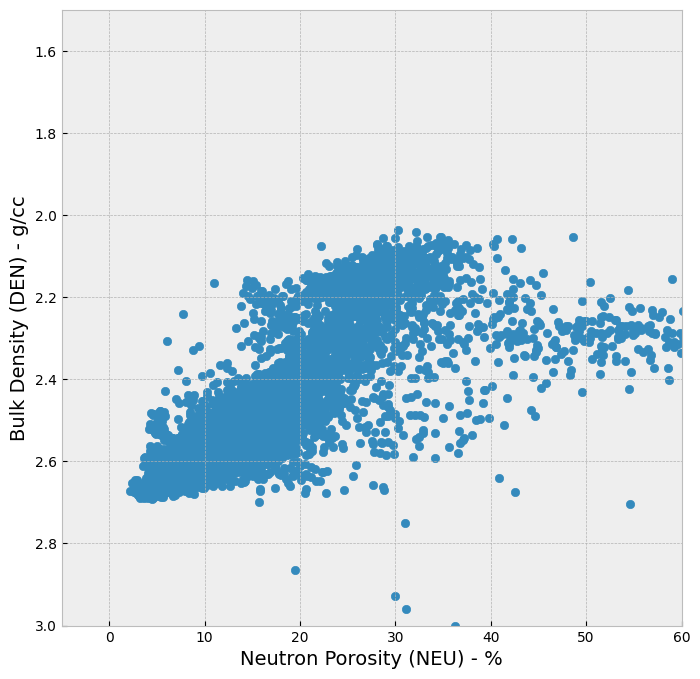

In [57]:
plt.rcParams['figure.figsize'] = (8, 8)   #used to set default plotsize

# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=well)

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

plt.show()

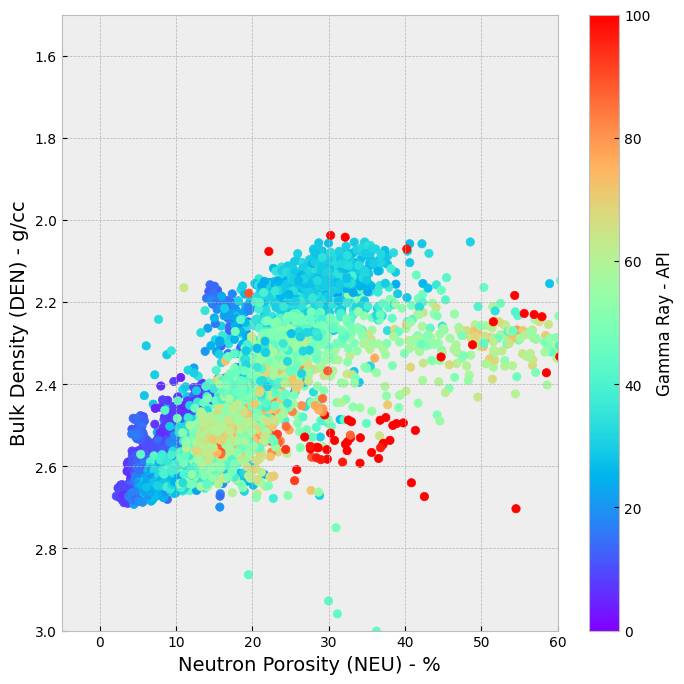

In [58]:
# We can also include GR in out crossplot. | We need to pass in values to vmin and vmax to show colors.
# To understand what the colours on the plot mean, we can add a colorbar by using plt.colorbar()
# We will use rainbow in cmap in scatter function for showing gamma ray values
# Low Gamma Ray values to appear in purple/blue and high values to appear in red.

plt.rcParams['figure.figsize'] = (8, 8)   #used to set default plotsize

#Set the style sheet to bmh
plt.style.use('bmh')

# Set up the scatter plot
plt.scatter(x='NEU', y='DEN', data=well, c='GR', vmin=0, vmax=100, cmap='rainbow')

# Change the X and Y ranges
plt.xlim(-5, 60)

# For the y axis, we need to flip by passing in the scale values in reverse order
plt.ylim(3.0, 1.5)

# Add in labels for the axes
plt.ylabel('Bulk Density (DEN) - g/cc', fontsize=14)
plt.xlabel('Neutron Porosity (NEU) - %', fontsize=14)

plt.colorbar(label='Gamma Ray - API')

plt.show()

# Plotting the Logs
Well log plots are a common visualization tool. They allow easy visualization of data (for example, Gamma Ray, Neutron Porosity, Bulk Density, etc) that has been acquired along the length (depth) of a wellbore.

In [59]:
well.head()

,DEPTH,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

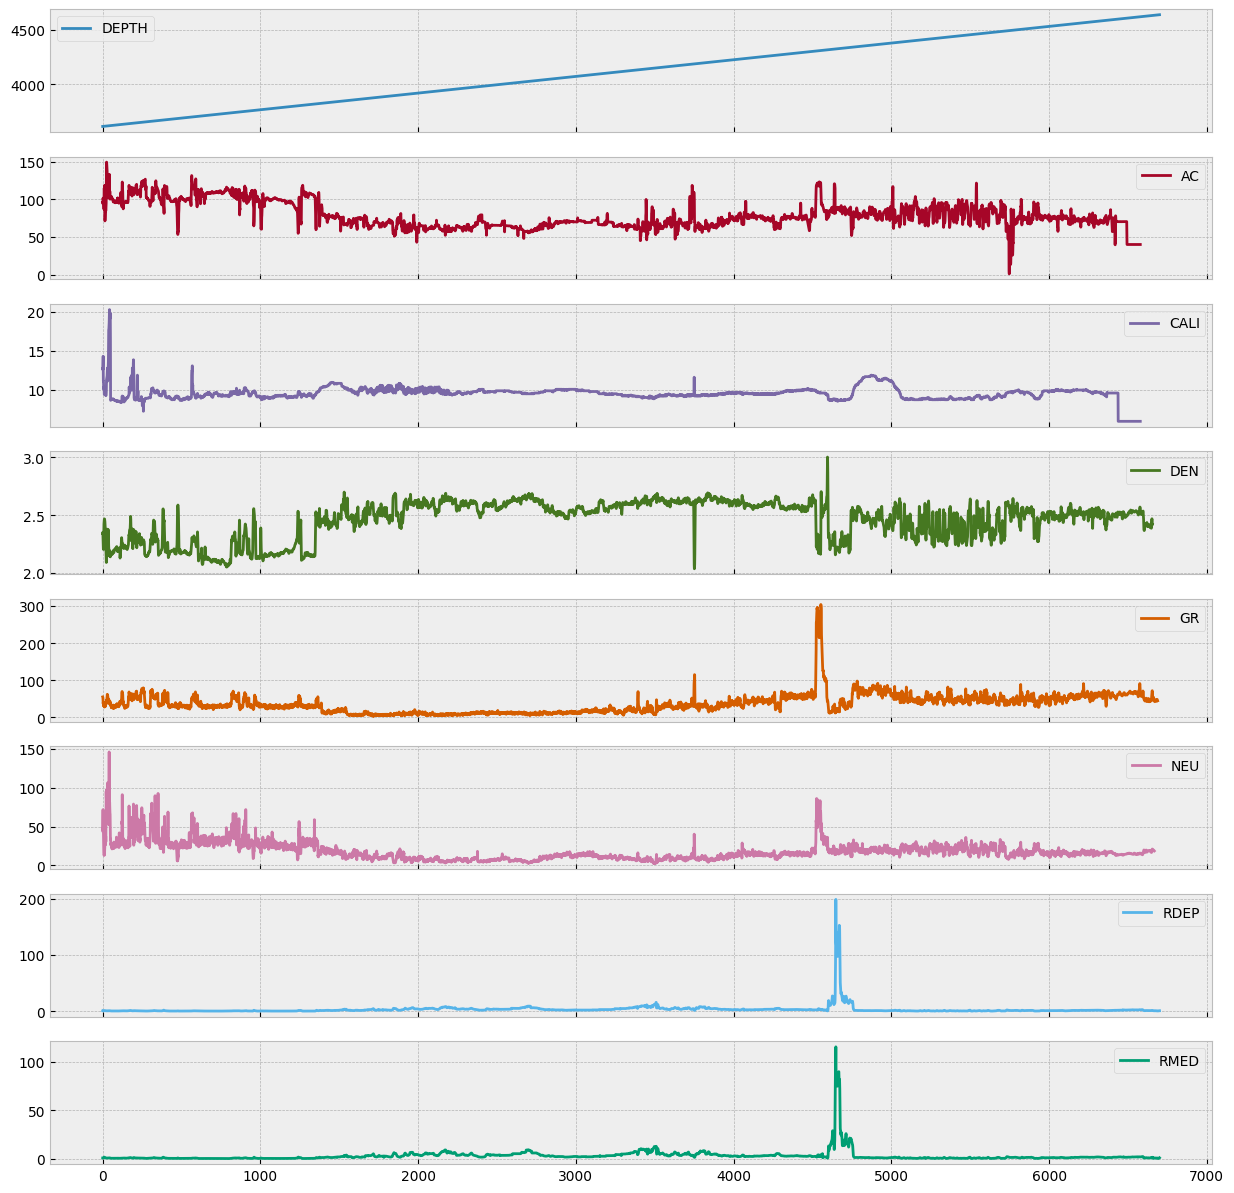

In [60]:
#to view all of the columns within the dataframe, we can generate a subplot grid
well.plot(subplots=True, figsize=(15, 15))

#This is a useful way to check where we have data and where we don't.

To generate subplots in matplotlib we will use subplot2grid.
For this we will define a figure and create an axis.

<ipython-input-61-70cbcc742d72>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,1),(0,0), rowspan=1, colspan=1)


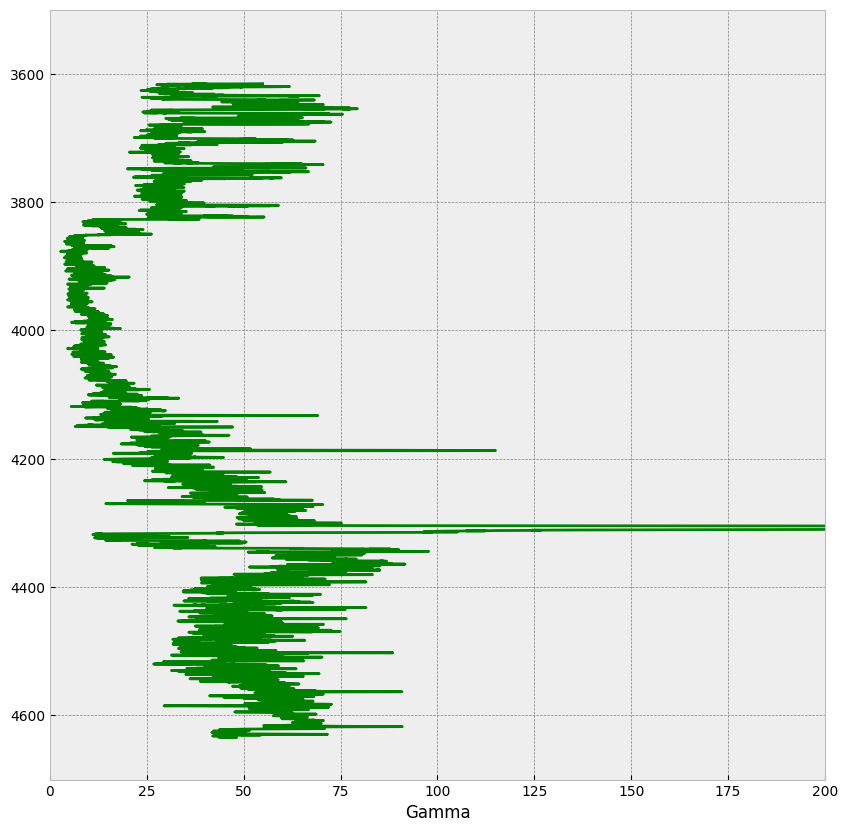

In [61]:
fig = plt.subplots(figsize = (10, 10))

#To set up plotting axis
ax1 = plt.subplot2grid((1,1),(0,0), rowspan=1, colspan=1)

#Now we will tell matplotlib what we want to plot
#Call the data from well dataframe
ax1.plot("GR", "DEPTH", data = well, color = "green")
#Assign a title track and change limit and set depth range
ax1.set_xlabel("Gamma")
ax1.set_xlim(0, 200)
ax1.set_ylim(4700, 3500)
ax1.grid(True)  # Ensure the grid is enabled
# Optionally, customize grid line style and color
ax1.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

plt.show()

Now we will add resistivity and density log using new axis ax2 and ax3.


<ipython-input-62-ec59fe347280>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


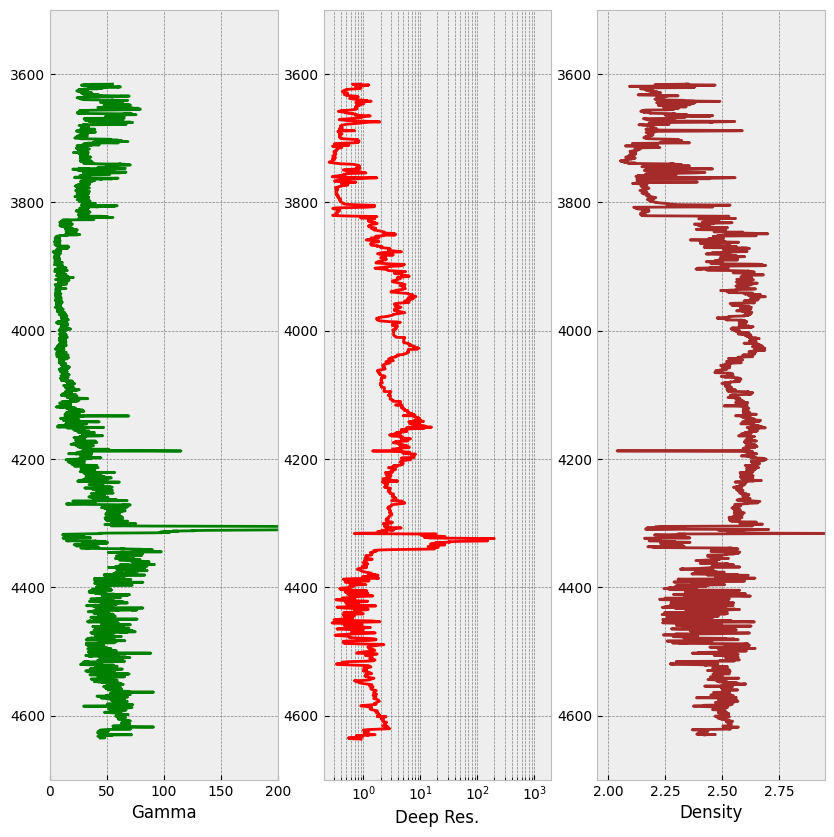

In [62]:
fig = plt.subplots(figsize=(10,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.set_xlim(0, 200) #unit in API
ax1.set_ylim(4700, 3500)
ax1.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

ax2.plot("RDEP", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Deep Res.")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()     #changing x axis to semilog
ax2.set_ylim(4700, 3500)
ax2.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

ax3.plot("DEN", "DEPTH", data = well, color = "brown")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.set_ylim(4700, 3500)
ax3.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

<ipython-input-63-15264c20c97f>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


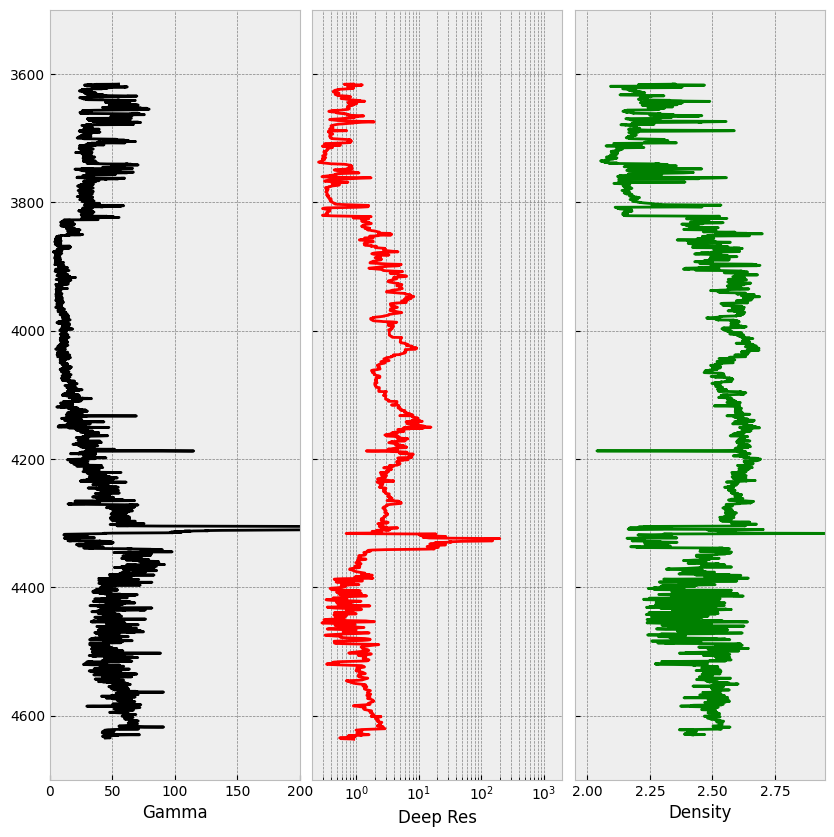

In [63]:
# we can extract the common elements(y limiy, grid, x label) and use a or loop for a cleaner code
# we will create curve_nemes and iterate thru index i
# we can also remove y labels from ax2 ax3 by marking them false

fig, axis = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Deep Res', 'Density']
#set up the axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)

#set up individual log tracks
ax1.plot("GR", "DEPTH", data = well, color = "black")
ax1.set_xlim(0, 200)

ax2.plot("RDEP", "DEPTH", data = well, color = "red")
ax2.set_xlim(0.2, 2000)
ax2.semilogx()

ax3.plot("DEN", "DEPTH", data = well, color = "green")
ax3.set_xlim(1.95, 2.95)

# for loop for common elements between the subplots
for i, ax in enumerate(fig.axes):
  ax.set_ylim(4700, 3500)
  ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
  ax.set_xlabel(curve_names[i])

#Hide tick labels on the y axis
for ax in [ax2, ax3]:
  plt.setp(ax.get_yticklabels(), visible=False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)



To add neutron porosity on top of density porosity plot we need to update our code

<ipython-input-64-d79eaf967f12>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)


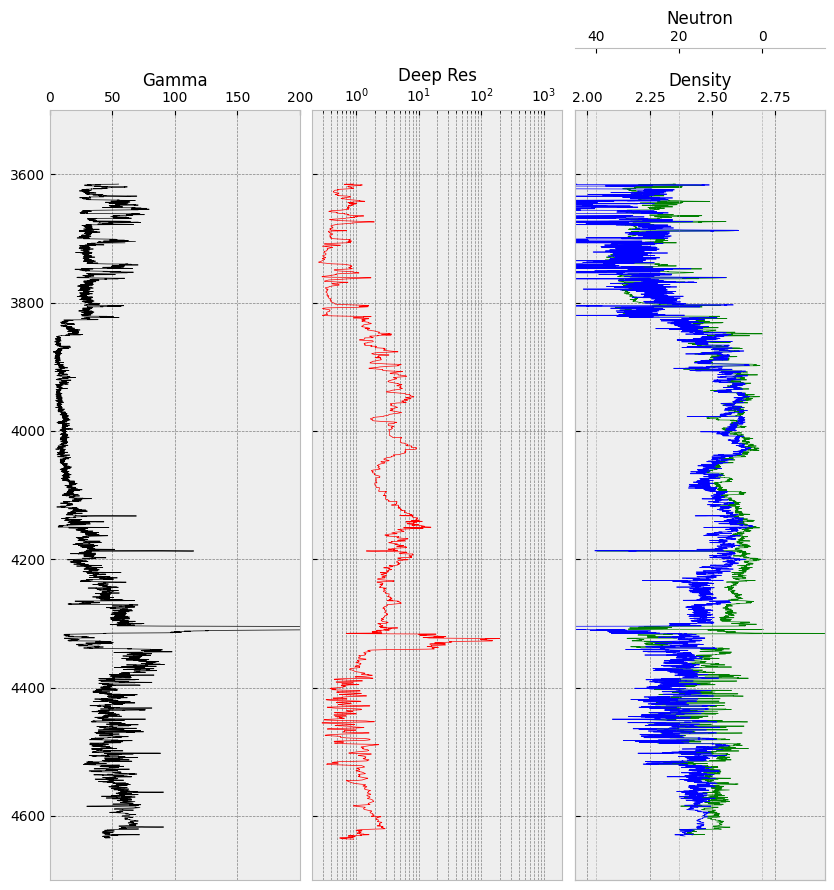

In [64]:
fig, axis = plt.subplots(figsize=(10,10))

curve_names = ['Gamma', 'Deep Res', 'Density', 'Neutron']
#set up the axes
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax3.twiny()

#set up individual log tracks
ax1.plot("GR", "DEPTH", data = well, color = "black", lw = 0.5)
ax1.set_xlim(0, 200)

ax2.plot("RDEP", "DEPTH", data = well, color = "red", lw = 0.5)
ax2.set_xlim(0.2, 2000)
ax2.semilogx()

ax3.plot("DEN", "DEPTH", data = well, color = "green", lw = 0.5)
ax3.set_xlim(1.95, 2.95)

ax4.plot("NEU", "DEPTH", data = well, color = "blue", lw = 0.5)
ax4.set_xlim(45, -15)

# for loop for common elements between the subplots
for i, ax in enumerate(fig.axes):
  ax.set_ylim(4700, 3500)
 # moving the ticks and labels to top
  ax.xaxis.set_label_position('top')
  ax.xaxis.set_ticks_position('top')
  ax.set_xlabel(curve_names[i])

  if i ==3:
    ax.spines["top"].set_position(('axes', 1.08))
  else :
     ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

#Hide tick labels on the y axis
for ax in [ax2, ax3]:
  plt.setp(ax.get_yticklabels(), visible=False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.05)


Observations -
*  We can see that around 4000 ft where gamma ray drops and resisitivity increases, neutron and density porosity are nearly equal whuch may indicate this is a carbonate interval.
*  Going down we can see neutron and density moving away from each other which can indicate shaly interval.